# 3. Regresión lineal con pytorch
Entrena y evalúa un modelo de regresión lineal para el conjunto de datos de calificaciones que
considere los dos atributos de entrada.

## Especificaciones
* Grafica los datos en 3D.
* Realiza la definición de la arquitectura usando tanto la interfaz de alto como la de medio nivel.
* Prueba distintos valores para los hiperparámetros.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import random
from torchinfo import summary

In [2]:
def set_seed(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

### Lectura de datos

In [3]:
url = 'https://raw.githubusercontent.com/gibranfp/CursoAprendizajeProfundo/2022-1/data/califs.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7


In [6]:
X = df[['prev', 'horas']].to_numpy(dtype='float32')
y = df['calif'].to_numpy(dtype='float32').reshape(-1,1)

In [7]:
X = torch.tensor(X)
y = torch.tensor(y)

In [8]:
ds = TensorDataset(X, y)

### Cargador de datos

In [9]:
def build_dl(dataset, batch_size=16):
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

### Gráfica de datos en 3D

In [10]:
x = df['prev'].to_numpy()
y = df['horas'].to_numpy()
z = df['calif'].to_numpy()

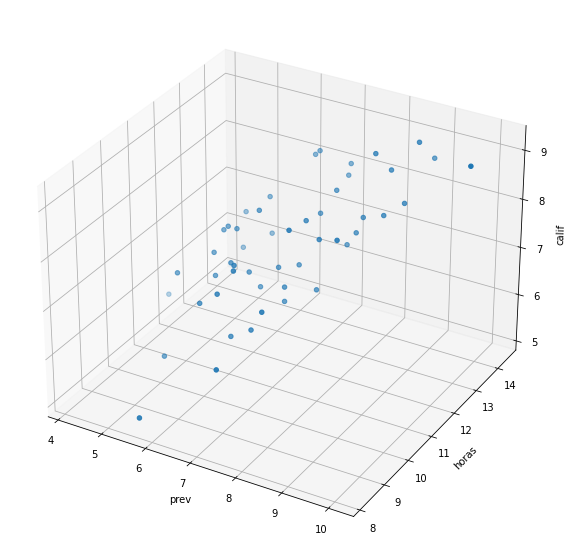

In [11]:
fig = plt.figure(figsize=(10.0,10.0))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('prev')
ax.set_ylabel('horas')
ax.set_zlabel('calif')
ax.scatter(x,y,z)
plt.show()

### Definición de arquitectura con API de medio nivel nivel

In [12]:
class Linear_regression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Linear_regression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

### Definición de arquitectura con API de alto nivel

In [13]:
def build_model(input_dim, output_dim):
    return torch.nn.Sequential(torch.nn.Linear(input_dim, output_dim))

### Función para realizar entrenamiento

In [14]:
def train_model(model, dl, learning_rate, epochs):
    opt = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        loss_hst = []
        for x, y_true in dl: 
            output = model(x)
            loss = F.mse_loss(output, y_true)
            opt.zero_grad()
            loss.backward()
            opt.step()
            loss_hst.append(loss.item()*100)
        
        loss = np.mean(loss_hst)
        print('Epoch: {}\tLoss = {}'.format(epoch, loss))

In [15]:
input_dim = 2
output_dim = 1
learning_rate = 1e-5
epochs = 200

### Entrenamiento de modelo construido mediante API de medio nivel

In [16]:
set_seed()
dl = build_dl(ds)
model_ml = Linear_regression(input_dim, output_dim)

In [17]:
summary(model_ml)

Layer (type:depth-idx)                   Param #
Linear_regression                        --
├─Linear: 1-1                            3
Total params: 3
Trainable params: 3
Non-trainable params: 0

In [18]:
train_model(model_ml, dl,learning_rate, epochs)

Epoch: 0	Loss = 1105.1831245422363
Epoch: 1	Loss = 1206.3064098358154
Epoch: 2	Loss = 1071.2189197540283
Epoch: 3	Loss = 1187.0683431625366
Epoch: 4	Loss = 1014.7113084793091
Epoch: 5	Loss = 975.9603500366211
Epoch: 6	Loss = 969.1303491592407
Epoch: 7	Loss = 875.2309441566467
Epoch: 8	Loss = 906.58118724823
Epoch: 9	Loss = 903.3422470092773
Epoch: 10	Loss = 795.1818943023682
Epoch: 11	Loss = 833.2152485847473
Epoch: 12	Loss = 799.5584011077881
Epoch: 13	Loss = 742.0026183128357
Epoch: 14	Loss = 778.0336499214172
Epoch: 15	Loss = 670.1196551322937
Epoch: 16	Loss = 678.2506942749023
Epoch: 17	Loss = 651.7133951187134
Epoch: 18	Loss = 704.9059271812439
Epoch: 19	Loss = 641.3807511329651
Epoch: 20	Loss = 622.1635341644287
Epoch: 21	Loss = 590.4163837432861
Epoch: 22	Loss = 522.1995949745178
Epoch: 23	Loss = 581.1612606048584
Epoch: 24	Loss = 552.3379683494568
Epoch: 25	Loss = 513.8895869255066
Epoch: 26	Loss = 577.5811672210693
Epoch: 27	Loss = 540.1746034622192
Epoch: 28	Loss = 535.284364

### Entrenamiento de modelo construido mediante API de alto nivel

In [19]:
set_seed()
dl = build_dl(ds)
model_hl = build_model(input_dim, output_dim)

In [20]:
summary(model_hl)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            3
Total params: 3
Trainable params: 3
Non-trainable params: 0

In [21]:
train_model(model_hl, dl,learning_rate, epochs)

Epoch: 0	Loss = 1105.1831245422363
Epoch: 1	Loss = 1206.3064098358154
Epoch: 2	Loss = 1071.2189197540283
Epoch: 3	Loss = 1187.0683431625366
Epoch: 4	Loss = 1014.7113084793091
Epoch: 5	Loss = 975.9603500366211
Epoch: 6	Loss = 969.1303491592407
Epoch: 7	Loss = 875.2309441566467
Epoch: 8	Loss = 906.58118724823
Epoch: 9	Loss = 903.3422470092773
Epoch: 10	Loss = 795.1818943023682
Epoch: 11	Loss = 833.2152485847473
Epoch: 12	Loss = 799.5584011077881
Epoch: 13	Loss = 742.0026183128357
Epoch: 14	Loss = 778.0336499214172
Epoch: 15	Loss = 670.1196551322937
Epoch: 16	Loss = 678.2506942749023
Epoch: 17	Loss = 651.7133951187134
Epoch: 18	Loss = 704.9059271812439
Epoch: 19	Loss = 641.3807511329651
Epoch: 20	Loss = 622.1635341644287
Epoch: 21	Loss = 590.4163837432861
Epoch: 22	Loss = 522.1995949745178
Epoch: 23	Loss = 581.1612606048584
Epoch: 24	Loss = 552.3379683494568
Epoch: 25	Loss = 513.8895869255066
Epoch: 26	Loss = 577.5811672210693
Epoch: 27	Loss = 540.1746034622192
Epoch: 28	Loss = 535.284364